In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url = 'https://finance.yahoo.com/gainers/'
response = requests.get(url)
status = response.status_code
if status == 200:
  page = response.text
  soup = bs(page)
else:
  print(f"Oops! Received status code {status}")


In [3]:
print(soup.prettify())
type(soup)

<!DOCTYPE html>
<html class="NoJs chrome desktop failsafe" data-color-theme="light" id="atomic" lang="en-US">
 <head prefix="og: https://ogp.me/ns#">
  <script>
   window.performance && window.performance.mark && window.performance.mark('PageStart');
  </script>
  <meta charset="utf-8"/>
  <title>
   Top Stock Gainers Today - Yahoo Finance
  </title>
  <meta content="Stock Screener, industry, index membership, share data, stock price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens" name="keywords"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="on" property="twitter:dnt"/>
  <meta content="458584288257241" property="fb:app_id"/>
  <meta content="#400090" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="See the list of the top gaining stocks today, including share price change and percentage, trading volume, intrad

bs4.BeautifulSoup

In [4]:
gainers_list = [ ]
gainers_table = soup.find(class_='W(100%)').tbody
print (gainers_table)


    


<tbody><tr class="simpTblRow Bgc($hoverBgColor):h BdB Bdbc($seperatorColor) Bdbc($tableBorderBlue):h H(32px) Bgc($lv2BgColor)"><td aria-label="Symbol" class="Va(m) Ta(start) Pstart(6px) Pend(10px) Miw(90px) Start(0) Pend(10px) simpTblRow:h_Bgc($hoverBgColor) Pos(st) Bgc($lv3BgColor) Z(1) Bgc($lv2BgColor) Ta(start)! Fz(s)" colspan=""><label class="Ta(c) Pos(r) Va(tb) Pend(5px) D(n)--print" data-id="portfolio-checkbox"><input aria-label="Select STAA" class="Pos(a) Op(0) checkbox" type="checkbox"/><svg class="Va(m)! H(16px) W(16px) checkbox:f+Stk($linkColor)! checkbox:f+Fill($linkColor)! Stk($plusGray) Fill($plusGray) Cur(p)" data-icon="checkbox-unchecked" height="16" style="stroke-width:0;vertical-align:bottom" viewbox="0 0 24 24" width="16"><path d="M3 3h18v18H3V3zm19-2H2c-.553 0-1 .448-1 1v20c0 .552.447 1 1 1h20c.552 0 1-.448 1-1V2c0-.552-.448-1-1-1z"></path></svg></label><a class="Fw(600) C($linkColor)" data-test="quoteLink" href="/quote/STAA" title="STAAR Surgical Company">STAA</a><d

In [5]:
for row in gainers_table.find_all('tr')[:10]: 
    symbol = row.find(attrs={'aria-label':'Symbol'}).text
    change = row.find(attrs={'aria-label':'% Change'}).text
    gainers_list.append({'Symbol':symbol,'Change_percentage':change})
#print(gainers_list)
gainers_df = pd.DataFrame(gainers_list)


gainers_df


,Symbol,Change_percentage
0,STAA,+16.48%
1,DLVHF,+15.11%
2,ZETA,+13.30%
3,LEVI,+12.38%
4,SKUFF,+8.27%
5,BMBLF,+6.50%
6,UWMC,+5.74%
7,CAG,+5.44%
8,MTNOY,+5.38%
9,LUNMF,+5.33%


1.	What are the top five daily gainers?

In [6]:
def get_symbols(soup):
    symbols_list = [ ]
    stats_table = soup.find(class_='W(100%)').tbody
    for row in stats_table.find_all('tr')[:10]:   
        symbol = row.find(attrs={'aria-label':'Symbol'}).text
        change = row.find(attrs={'aria-label':'% Change'}).text
        symbols_list.append({'Symbol':symbol,'Change_percentage':change})
    return(symbols_list)




In [7]:
gainers_df = pd.DataFrame(get_symbols(soup))
gainers_df

,Symbol,Change_percentage
0,STAA,+16.48%
1,DLVHF,+15.11%
2,ZETA,+13.30%
3,LEVI,+12.38%
4,SKUFF,+8.27%
5,BMBLF,+6.50%
6,UWMC,+5.74%
7,CAG,+5.44%
8,MTNOY,+5.38%
9,LUNMF,+5.33%


<Axes: xlabel='Symbol', ylabel='Change_percentage'>

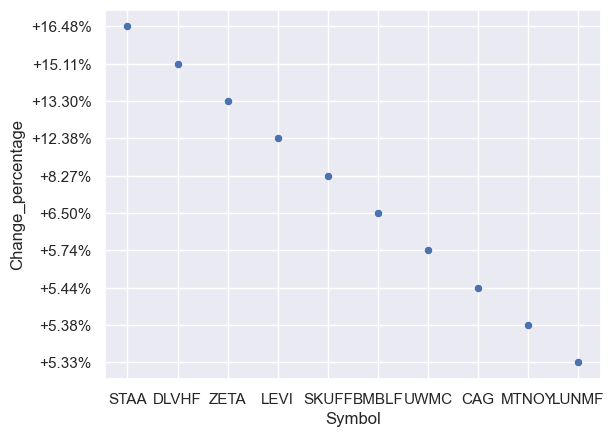

In [10]:
sns.set()
sns.scatterplot(x='Symbol',y='Change_percentage',data=gainers_df)


In [ ]:
url = 'https://finance.yahoo.com/losers/'
response = requests.get(url)
status = response.status_code
if status == 200:
  page = response.text
  soup = bs(page)
else:
  print(f"Oops! Received status code {status}")


In [ ]:
print(soup.prettify())
type(soup)

2.	What are the top five daily losers?

In [ ]:
def get_symbols(soup):
    symbols_list = [ ]
    stats_table = soup.find(class_='W(100%)').tbody
    for row in stats_table.find_all('tr')[:5]:  
        symbol = row.find(attrs={'aria-label':'Symbol'}).text
        change = row.find(attrs={'aria-label':'% Change'}).text
        symbols_list.append({'Symbol':symbol,'Change_percentage':change})
    return(symbols_list)


In [ ]:
losers_df = pd.DataFrame(get_symbols(soup))
losers_df

3. What are the top five stocks with the highest trading volume during the trading day?

In [ ]:
url = 'https://finance.yahoo.com/most-active/'
response = requests.get(url)
status = response.status_code
if status == 200:
  page = response.text
  soup = bs(page)
else:
  print(f"Oops! Received status code {status}")


In [ ]:
highestTrading_df = pd.DataFrame(get_symbols(soup))
highestTrading_df

4. What are the top five undervalued growth stocks?

In [ ]:
url = 'https://finance.yahoo.com/screener/predefined/undervalued_growth_stocks/'
response = requests.get(url)
status = response.status_code
if status == 200:
  page = response.text
  soup = bs(page)
else:
  print(f"Oops! Received status code {status}")


In [ ]:
undervalued_df = pd.DataFrame(get_symbols(soup))
undervalued_df

5. What are the top five recently rated stocks that are considered a Strong Buy by analysts?

In [ ]:
url = 'https://finance.yahoo.com/screener/predefined/analyst_strong_buy_stocks/'
response = requests.get(url)
status = response.status_code
if status == 200:
  page = response.text
  soup = bs(page)
else:
  print(f"Oops! Received status code {status}")


In [ ]:
strongBuy_df = pd.DataFrame(get_symbols(soup))
strongBuy_df